## Aula Assíncrona 22

- RA: 23022371 - Carlos Eduardo de Souza
- RA: 23022369 - Bruno Caboclo Dos Santos Ribeiro
- RA: 23022385 - Julia Correa Colombo

# Título: Classificação de popularidade de músicas usando PyTorch

## Descrição:
Neste exercício, você será desafiado a aplicar o PyTorch para construir um modelo de classificação capaz de prever a popularidade de músicas com base em seus recursos. Para isso, utilizaremos um conjunto de dados que contém informações sobre as melhores músicas do Spotify de 2000 a 2023.

### O conjunto de dados possui as seguintes colunas relevantes para nosso problema:

- artist: o artista da música
- top genre: o gênero musical predominante da música
- bpm: batidas por minuto da música
- energy: energia da música
- dB: decibéis da música
- liveness: probabilidade de ser uma gravação ao vivo
- valence: valência emocional da música
- acousticness: probabilidade de ser uma música acústica
- danceability: capacidade de dançar ao ritmo da música
- duration: duração da música em segundos
- speechiness: probabilidade de conter palavras faladas na música
- popularity: popularidade da música (variando de 0 a 100)


Seu objetivo é treinar um modelo de classificação usando PyTorch que seja capaz de prever a popularidade de uma música com base em seus recursos.

### Sugestão de passos a seguir:

1. Faça a importação do conjunto de dados a partir do dataset fornecido.
2. Importe as bibliotecas necessárias: pandas, numpy, torch, torchvision, etc.
3. Carregue o conjunto de dados usando a biblioteca Pandas.
4. Realize o pré-processamento necessário no conjunto de dados, incluindo a categorização dos valores da coluna "popularity" em três classes (0, 1 e 2) usando a função pd.cut.
5. Realize a codificação one-hot das colunas "artist" e "top genre" usando a função onehot_encode.
6. Separe o conjunto de dados em recursos (X) e rótulos de destino (y). Descarte as colunas irrelevantes para o modelo.
7. Converta os dados para tensores do PyTorch.
8. Crie uma classe CTDataset que herda torch.utils.data.Dataset e implemente os métodos __init__, __len__ e __getitem__ para representar o conjunto de dados.
7. Divida o conjunto de dados em conjuntos de treinamento, validação e teste usando a função random_split do PyTorch, de acordo com as proporções especificadas.
8. Crie carregadores de dados (DataLoader) para cada conjunto, com um tamanho de lote (batch size) adequado.
9. Defina a arquitetura da rede neural no PyTorch, incluindo as camadas Linear necessárias.
10. Defina a função de perda (loss function) como CrossEntropyLoss e o otimizador como Adam.
11. Mova o modelo para a GPU, se disponível, para acelerar o treinamento.
12. Execute o treinamento do modelo por um número específico de épocas, calculando a perda média ao longo das iterações de treinamento.
13. Avalie o desempenho do modelo nos conjuntos de validação e teste, calculando a acurácia, precisão, recall e exibindo o relatório de classificação.
15. Discuta as descobertas e faça uma reflexão sobre a aplicação do PyTorch em problemas de classificação de dados do mundo real.

**O objetivo é alcançar a melhor precisão possível na classificação da popularidade das músicas. Experimente diferentes arquiteturas de rede neural, funções de ativação, hiperparâmetros e técnicas de regularização para obter resultados ainda melhores.**

**Você pode utilizar as bibliotecas matplotlib ou outras ferramentas de visualização para analisar os resultados e apresentar gráficos informativos.**

In [2]:
#1.Importação do conjunto de dados

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import random_split
import torch.nn.functional as F



df = pd.read_csv('./Best Songs on Spotify from 2000-2023-1.csv', delimiter=';')
df.head()

#2.Importação das bibliotecas necessárias (Já realizadas)

#3.Carregamento do conjunto de dados usando a biblioteca Pandas (Já realizadas)

,title,artist,top genre,year,bpm,energy,danceability,dB,liveness,valence,duration,acousticness,speechiness,popularity
0,Flowers,Miley Cyrus,pop,2023,118,68,71,-4,3,65,200,6,7,98
1,Cupid - Twin Ver.,FIFTY FIFTY,k-pop girl group,2023,120,59,78,-8,35,73,174,44,3,97
2,BESO,ROSALÍA,pop,2023,95,64,77,-7,17,53,195,74,14,96
3,Boy's a liar Pt. 2,PinkPantheress,bronx drill,2023,133,81,70,-8,25,86,131,25,5,96
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,rap,2022,98,62,72,-6,8,17,222,42,5,96


In [3]:
#4.Pré-processamento do conjunto de dados
df["popularity"] = pd.cut(df["popularity"], bins=[-1, 33, 66, 100], labels=[0, 1, 2])


In [4]:
# Passo 5: Codificação one-hot das colunas "artist" e "top genre"
columns_to_encode = ["artist", "top genre"]

# Criar um objeto OneHotEncoder
encoder = OneHotEncoder(sparse=False, sparse_output=False)

# Codificar as colunas "artist" e "top genre" nos dados
X_encoded = encoder.fit_transform(df[columns_to_encode])

c:\Users\cadu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
# Passo 6: Separação do conjunto de dados em recursos (X) e rótulos de destino (y)
X = X_encoded.astype(float)
y = df["popularity"].values.astype(float)


In [6]:
# Passo 7: Conversão dos dados para tensores do PyTorch
X = X.astype(np.float32)
y = y.astype(np.float32)

x_train_tensor = torch.from_numpy(X).float()
y_train_tensor = torch.from_numpy(y).unsqueeze(1).float()



In [7]:
#8.Criação da classe CTDataset
class CTDataset(data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = torch.from_numpy(y).long()
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]

#7.Divisão do conjunto de dados em conjuntos de treinamento, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#8.Crie carregadores de dados (DataLoader) para cada conjunto, com um tamanho de lote (batch size) adequado.
batch_size = 64
train_dataset = CTDataset(X_train, y_train)
val_dataset = CTDataset(X_val, y_val)
test_dataset = CTDataset(X_test, y_test)

train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=batch_size)
test_loader = data.DataLoader(test_dataset, batch_size=batch_size)



In [8]:
#9.Defina a arquitetura da rede neural no PyTorch, incluindo as camadas Linear necessárias.

class Classifier(nn.Module):

    def __init__(self):

        super().__init__()
        self.fc1 = nn.Linear(1280, 256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        self.dropout = nn.Dropout(0.2)

    def forward(self,x):

        x = x.view(x.shape[0],-1)
        x = self.dropout(F.relu(self.fc1(x))) 
        x = self.dropout(F.relu(self.fc2(x)))   
        x = self.dropout(F.relu(self.fc3(x)))  
        x = F.log_softmax(self.fc4(x))   

        return x
    

In [9]:
#10.  Defina a função de perda (loss function) como CrossEntropyLoss e o otimizador como Adam.

# Definição da arquitetura da rede neural
model = Classifier()

# Definição da função de perda (loss function)
criterion = nn.CrossEntropyLoss()

# Definição do otimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

val_loss_min = np.inf
epochs = 40
steps = 0
model.train()
train_losses = []
val_losses = []


In [10]:
#11.Mova o modelo para a GPU, se disponível, para acelerar o treinamento.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

x_train_tensor = x_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)

In [11]:
#12. Execute o treinamento do modelo por um número específico de épocas, calculando a perda média ao longo das iterações de treinamento.

num_epochs = 100000

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
            
    # Printar a perda a cada 100 iterações
    if (epoch+1) % 10000 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


C:\Users\cadu\AppData\Local\Temp\ipykernel_10312\312785182.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.fc4(x))


Epoch [10000/100000], Loss: 0.2028
Epoch [20000/100000], Loss: 0.2224
Epoch [30000/100000], Loss: 0.2604
Epoch [40000/100000], Loss: 0.0816
Epoch [50000/100000], Loss: 0.0487
Epoch [60000/100000], Loss: 0.0483
Epoch [70000/100000], Loss: 0.3402
Epoch [80000/100000], Loss: 0.2819
Epoch [90000/100000], Loss: 0.0639
Epoch [100000/100000], Loss: 0.2141


In [12]:
def evaluate(model, loader):
    model.eval()
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

    accuracy = total_correct / total_samples
    return accuracy

# Avaliação no conjunto de validação
val_accuracy = evaluate(model, val_loader)
print(f"Acurácia no conjunto de validação: {val_accuracy:.4f}")

# Avaliação no conjunto de teste
test_accuracy = evaluate(model, test_loader)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")


Acurácia no conjunto de validação: 0.7067
Acurácia no conjunto de teste: 0.6732


C:\Users\cadu\AppData\Local\Temp\ipykernel_10312\312785182.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.fc4(x))


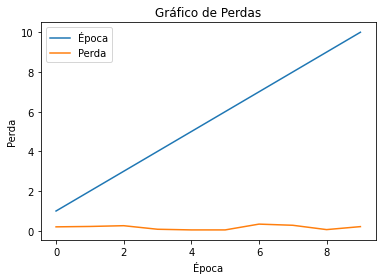

In [26]:
import matplotlib.pyplot as plt

# plt_epoch = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
plt_epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt_loss = [0.2028, 0.2224, 0.2604, 0.0816, 0.0487, 0.0483, 0.3402, 0.2819, 0.0639, 0.2141]

plt.plot(plt_epoch)
plt.plot(plt_loss)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Gráfico de Perdas')
plt.legend(labels=['Época', 'Perda'])
plt.show()

In [13]:
from sklearn.metrics import classification_report

def predict(model, loader):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    return all_labels, all_predictions

# Previsões no conjunto de validação
val_labels, val_predictions = predict(model, val_loader)
print("Relatório de Classificação (Conjunto de Validação):")
print(classification_report(val_labels, val_predictions))

# Previsões no conjunto de teste
test_labels, test_predictions = predict(model, test_loader)
print("Relatório de Classificação (Conjunto de Teste):")
print(classification_report(test_labels, test_predictions))


Relatório de Classificação (Conjunto de Validação):
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.52      0.59      0.55       109
           2       0.81      0.76      0.78       246

    accuracy                           0.71       358
   macro avg       0.66      0.67      0.67       358
weighted avg       0.72      0.71      0.71       358

Relatório de Classificação (Conjunto de Teste):
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.47      0.56      0.51       108
           2       0.79      0.73      0.76       247

    accuracy                           0.67       358
   macro avg       0.59      0.54      0.56       358
weighted avg       0.69      0.67      0.68       358



C:\Users\cadu\AppData\Local\Temp\ipykernel_10312\312785182.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.fc4(x))
C:\Users\cadu\AppData\Local\Temp\ipykernel_10312\312785182.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(self.fc4(x))


### Discussão

A análise das métricas de avaliação, como precisão, recall, f1-score e acurácia, fornece insights sobre o desempenho do modelo em diferentes classes ou categorias.

Com base no resultado do nosso treinamento e analisando o relatório de classificação, segue discussões:

A precisão média ponderada (weighted avg) é de 71% no conjunto de validação e 68% no conjunto de teste. Isso indica que o modelo está realizando uma classificação razoável, mas ainda há espaço para melhorias. A classe "2" (maior popularidade) parece ter um desempenho melhor do que as outras classes, sugerindo que o modelo pode ter dificuldade em distinguir entre as classes de popularidade mais baixa.
O PyTorch oferece vários recursos e flexibilidade para enfrentar problemas de classificação de dados do mundo real. É necessário considerar cuidadosamente a qualidade dos dados, experimentar diferentes abordagens e ajustar os hiperparâmetros para obter resultados cada vez melhores. É possível construir modelos eficazes e obter insights valiosos por meio da classificação de dados.